<a href="https://colab.research.google.com/github/eduard0cortes/Desaf-o-Data-Science/blob/main/alurastorelatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación
ingreso total por cada tienda


In [ ]:
#Calculo del ingreso total para cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

#formateado los ingresos con separador de miles y símbolo de pesos
ingreso_tienda1_formateado = "{:,.0f}".format(ingreso_tienda1)
ingreso_tienda2_formateado = "{:,.0f}".format(ingreso_tienda2)
ingreso_tienda3_formateado = "{:,.0f}".format(ingreso_tienda3)
ingreso_tienda4_formateado = "{:,.0f}".format(ingreso_tienda4)

#imprimir los resultados
print("Ingreso total tienda 1: $", ingreso_tienda1_formateado)
print("Ingreso total tienda 2: $", ingreso_tienda2_formateado)
print("Ingreso total tienda 3: $", ingreso_tienda3_formateado)
print("Ingreso total tienda 4: $", ingreso_tienda4_formateado)



Ingreso total tienda 1: $ 1,150,880,400
Ingreso total tienda 2: $ 1,116,343,500
Ingreso total tienda 3: $ 1,098,019,600
Ingreso total tienda 4: $ 1,038,375,700


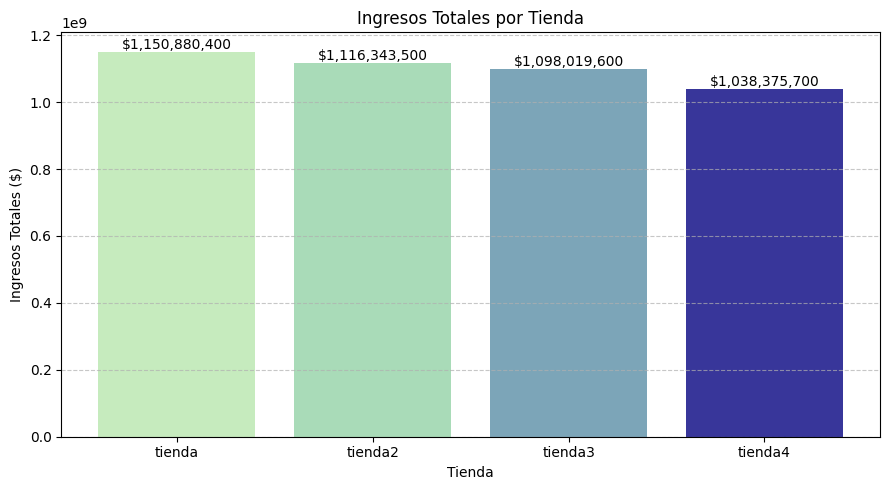

In [ ]:
tiendas = ['tienda', 'tienda2', 'tienda3', 'tienda4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
colores = ['#C6EBBE', '#A9DBB8', '#7CA5B8', '#38369A']

plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, ingresos, color=colores)
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"${yval:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

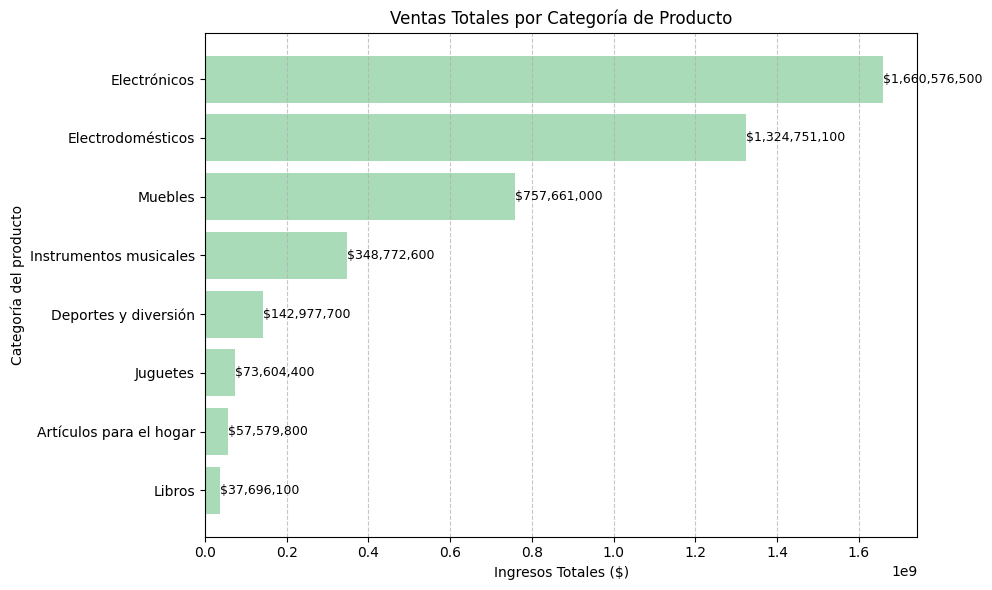

In [ ]:
#Unir los datos de todas las tiendas en un solo DataFrame
datos_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
#Agrupar los datos por categoría y sumar los precios
ventas_por_categoria = datos_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

#Visualizacion
plt.figure(figsize=(10, 6))
barras = plt.barh(ventas_por_categoria.index, ventas_por_categoria.values, color='#A9DBB8')
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Ingresos Totales ($)')
plt.ylabel('Categoría del producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Para que la categoría con más ventas quede arriba

#Etiquetas sobre las barras
for barra in barras:
    xval = barra.get_width()
    plt.text(xval + 10000, barra.get_y() + barra.get_height()/2, f"${xval:,.0f}", va='center', fontsize=9)
plt.tight_layout()
plt.show()


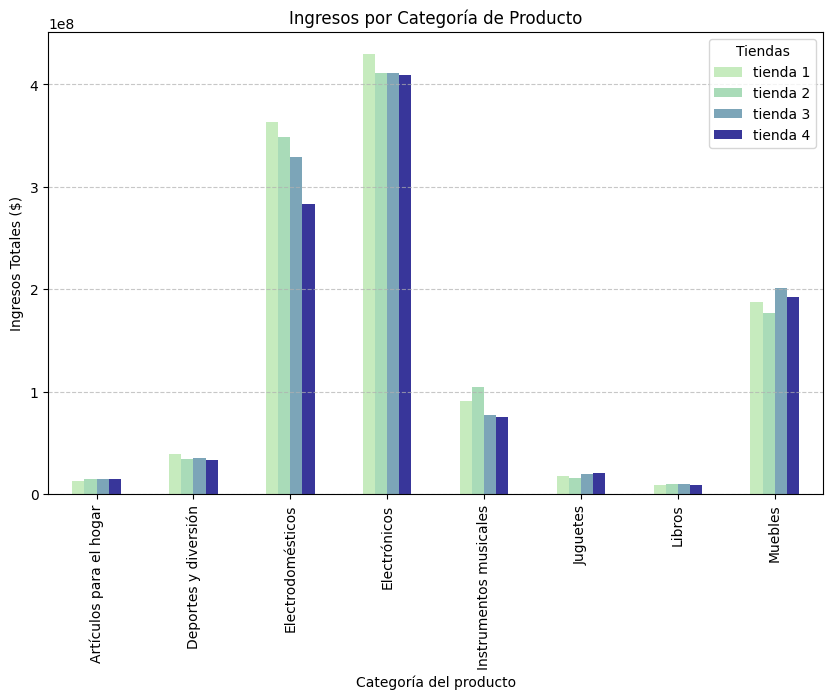

In [ ]:
#Crear un DataFrame con los ingresos por categoría para cada tienda
categorias_tienda1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
categorias_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
categorias_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
categorias_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

#Unir en un solo DataFrame para hacer comparación
df_categorias = pd.DataFrame({
    "tienda 1": categorias_tienda1,
    "tienda 2": categorias_tienda2,
    "tienda 3": categorias_tienda3,
    "tienda 4": categorias_tienda4
})

#Visualizacion
df_categorias.plot(kind='bar', figsize=(10, 6), color=['#C6EBBE', '#A9DBB8', '#7CA5B8', '#38369A'])
plt.title('Ingresos por Categoría de Producto')
plt.xlabel('Categoría del producto')
plt.ylabel('Ingresos Totales ($)')
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

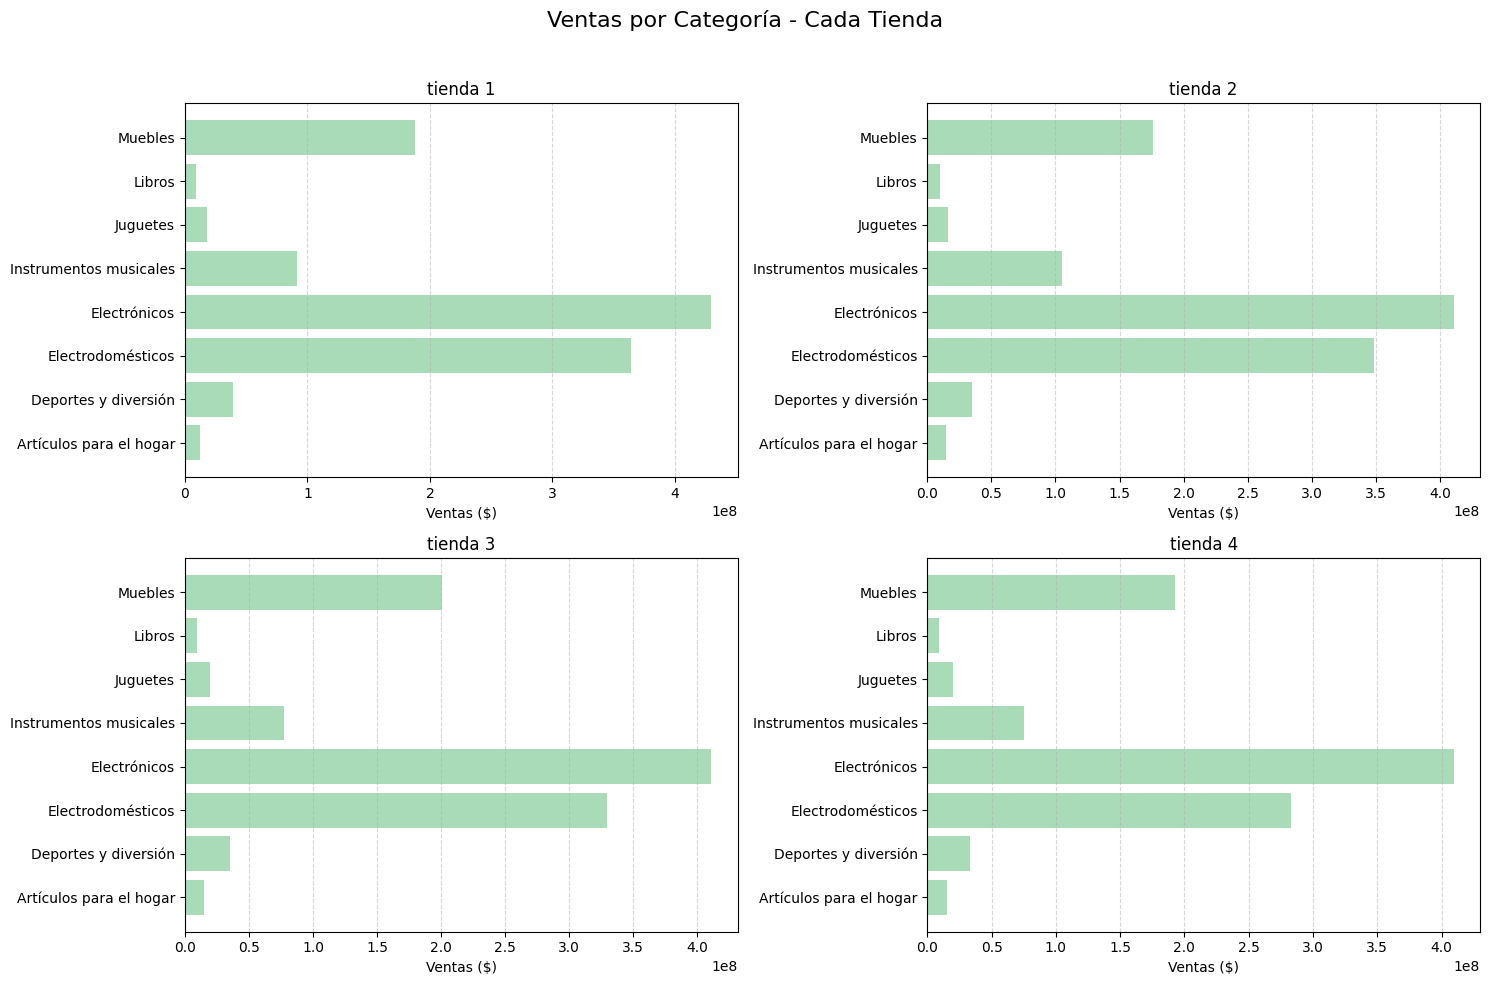

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
tiendas_data = [tienda, tienda2, tienda3, tienda4]
tiendas_nombres = ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']
for i, ax in enumerate(axes.flatten()):
    categoria = tiendas_data[i].groupby('Categoría del Producto')['Precio'].sum()
    ax.barh(categoria.index, categoria.values, color='#A9DBB8')
    ax.set_title(tiendas_nombres[i])
    ax.set_xlabel('Ventas ($)')
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.suptitle('Ventas por Categoría - Cada Tienda', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Calificacion promedio por tienda
calif_prom_tienda1 = tienda['Calificación'].mean()
calif_prom_tienda2 = tienda2['Calificación'].mean()
calif_prom_tienda3 = tienda3['Calificación'].mean()
calif_prom_tienda4 = tienda4['Calificación'].mean()

print(f"la calificacion promedio de la tienda 1 es: {calif_prom_tienda1:.2f}")
print(f"la calificacion promedio de la tienda 2 es: {calif_prom_tienda2:.2f}")
print(f"la calificacion promedio de la tienda 3 es: {calif_prom_tienda3:.2f}")
print(f"la calificacion promedio de la tienda 4 es: {calif_prom_tienda4:.2f}")

la calificacion promedio de la tienda 1 es: 3.98
la calificacion promedio de la tienda 2 es: 4.04
la calificacion promedio de la tienda 3 es: 4.05
la calificacion promedio de la tienda 4 es: 4.00


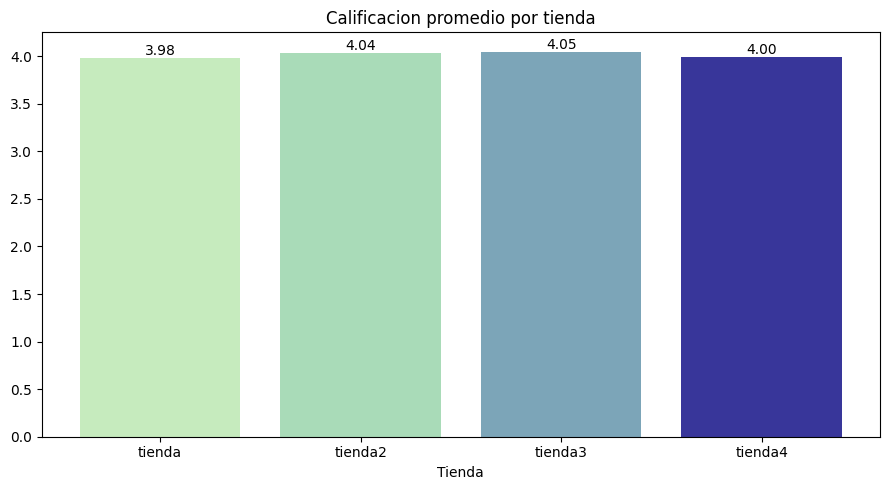

In [ ]:
tiendas = ['tienda', 'tienda2', 'tienda3', 'tienda4']
calificaciones = [calif_prom_tienda1, calif_prom_tienda2, calif_prom_tienda3, calif_prom_tienda4]
colores = ['#C6EBBE', '#A9DBB8', '#7CA5B8', '#38369A']

plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, calificaciones, color=colores)
plt.title('Calificacion promedio por tienda')
plt.xlabel('Tienda')

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"{yval:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
#Calcular calificacion promedio
calificaciones = {
    'tienda 1': tienda['Calificación'].mean(),
    'tienda 2': tienda2['Calificación'].mean(),
    'tienda 3': tienda3['Calificación'].mean(),
    'tienda 4': tienda4['Calificación'].mean()
}
# Crear DataFrame y ordenar por calificacion
df_calificaciones = pd.DataFrame(list(calificaciones.items()), columns=['Tienda', 'Calificación Promedio'])
df_calificaciones = df_calificaciones.sort_values(by='Calificación Promedio', ascending=False)

#mostrar
print(df_calificaciones)

     Tienda  Calificación Promedio
2  tienda 3               4.048326
1  tienda 2               4.037304
3  tienda 4               3.995759
0  tienda 1               3.976685


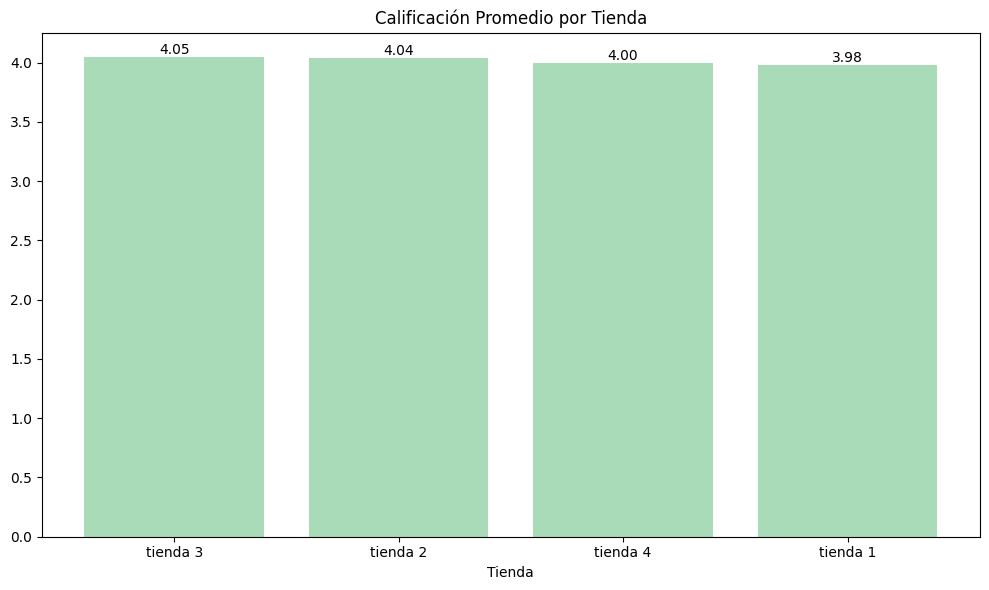

In [ ]:
#gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(df_calificaciones['Tienda'], df_calificaciones['Calificación Promedio'], color='#A9DBB8')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt

#etiquetas
for i, v in enumerate(df_calificaciones['Calificación Promedio']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
# Mostrar los 5 productos MAS vendidos por tienda

# Tienda 1
top5_tienda1 = tienda['Producto'].value_counts().head(5)
print("Los 5 productos más vendidos en la tienda 1 son:")
print(top5_tienda1)

# Tienda 2
top5_tienda2 = tienda2['Producto'].value_counts().head(5)
print("\nLos 5 productos más vendidos en la tienda 2 son:")
print(top5_tienda2)

# Tienda 3
top5_tienda3 = tienda3['Producto'].value_counts().head(5)
print("\nLos 5 productos más vendidos en la tienda 3 son:")
print(top5_tienda3)

# Tienda 4
top5_tienda4 = tienda4['Producto'].value_counts().head(5)
print("\nLos 5 productos más vendidos en la tienda 4 son:")
print(top5_tienda4)


Los 5 productos más vendidos en la tienda 1 son:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Los 5 productos más vendidos en la tienda 2 son:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Los 5 productos más vendidos en la tienda 3 son:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Los 5 productos más vendidos en la tienda 4 son:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


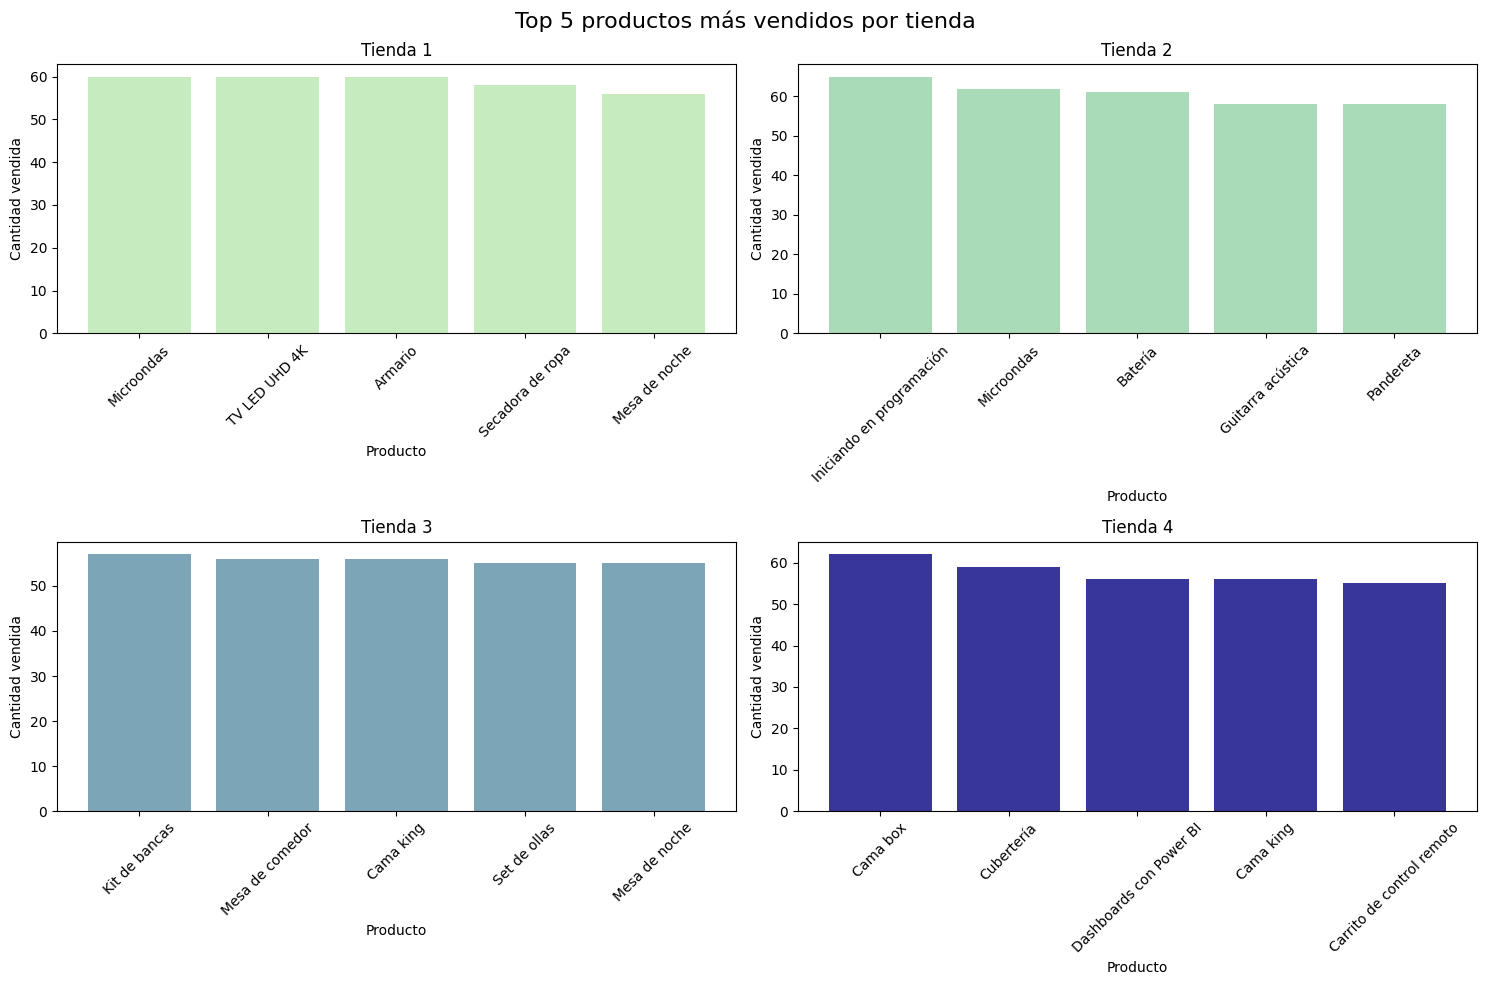

In [ ]:
# gráfica con 4 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 5 productos más vendidos por tienda', fontsize=16)

# Tienda 1
axs[0, 0].bar(top5_tienda1.index, top5_tienda1.values, color='#C6EBBE')
axs[0, 0].set_title('Tienda 1')
axs[0, 0].set_xlabel('Producto')
axs[0, 0].set_ylabel('Cantidad vendida')
axs[0, 0].tick_params(axis='x', rotation=45)

# Tienda 2
axs[0,1].bar(top5_tienda2.index, top5_tienda2.values, color='#A9DBB8')
axs[0,1].set_title('Tienda 2')
axs[0,1].set_xlabel('Producto')
axs[0,1].set_ylabel('Cantidad vendida')
axs[0, 1].tick_params(axis='x', rotation=45)

# Tienda
axs[1,0].bar(top5_tienda3.index, top5_tienda3.values, color='#7CA5B8')
axs[1,0].set_title('Tienda 3')
axs[1,0].set_xlabel('Producto')
axs[1,0].set_ylabel('Cantidad vendida')
axs[1, 0].tick_params(axis='x', rotation=45)

# Tienda 4
axs[1,1].bar(top5_tienda4.index, top5_tienda4.values, color='#38369A')
axs[1,1].set_title('Tienda 4')
axs[1,1].set_xlabel('Producto')
axs[1,1].set_ylabel('Cantidad vendida')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Mostrar los 5 productos MENOS vendidos por tienda

# Tienda 1
bottom5_tienda1 = tienda['Producto'].value_counts().tail(5)
print("Los 5 productos menos vendidos en la tienda 1 son:")
print(bottom5_tienda1)

# Tienda 2
bottom5_tienda2 = tienda2['Producto'].value_counts().tail(5)
print("\nLos 5 productos menos vendidos en la tienda 2 son:")
print(bottom5_tienda2)

# Tienda 3
bottom5_tienda3 = tienda3['Producto'].value_counts().tail(5)
print("\nLos 5 productos menos vendidos en la tienda 3 son:")
print(bottom5_tienda3)

# Tienda 4
bottom5_tienda4 = tienda4['Producto'].value_counts().tail(5)
print("\nLos 5 productos menos vendidos en la tienda 4 son:")
print(bottom5_tienda4



Los 5 productos menos vendidos en la tienda 1 son:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Los 5 productos menos vendidos en la tienda 2 son:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Los 5 productos menos vendidos en la tienda 3 son:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

Los 5 productos menos vendidos en la tienda 4 son:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


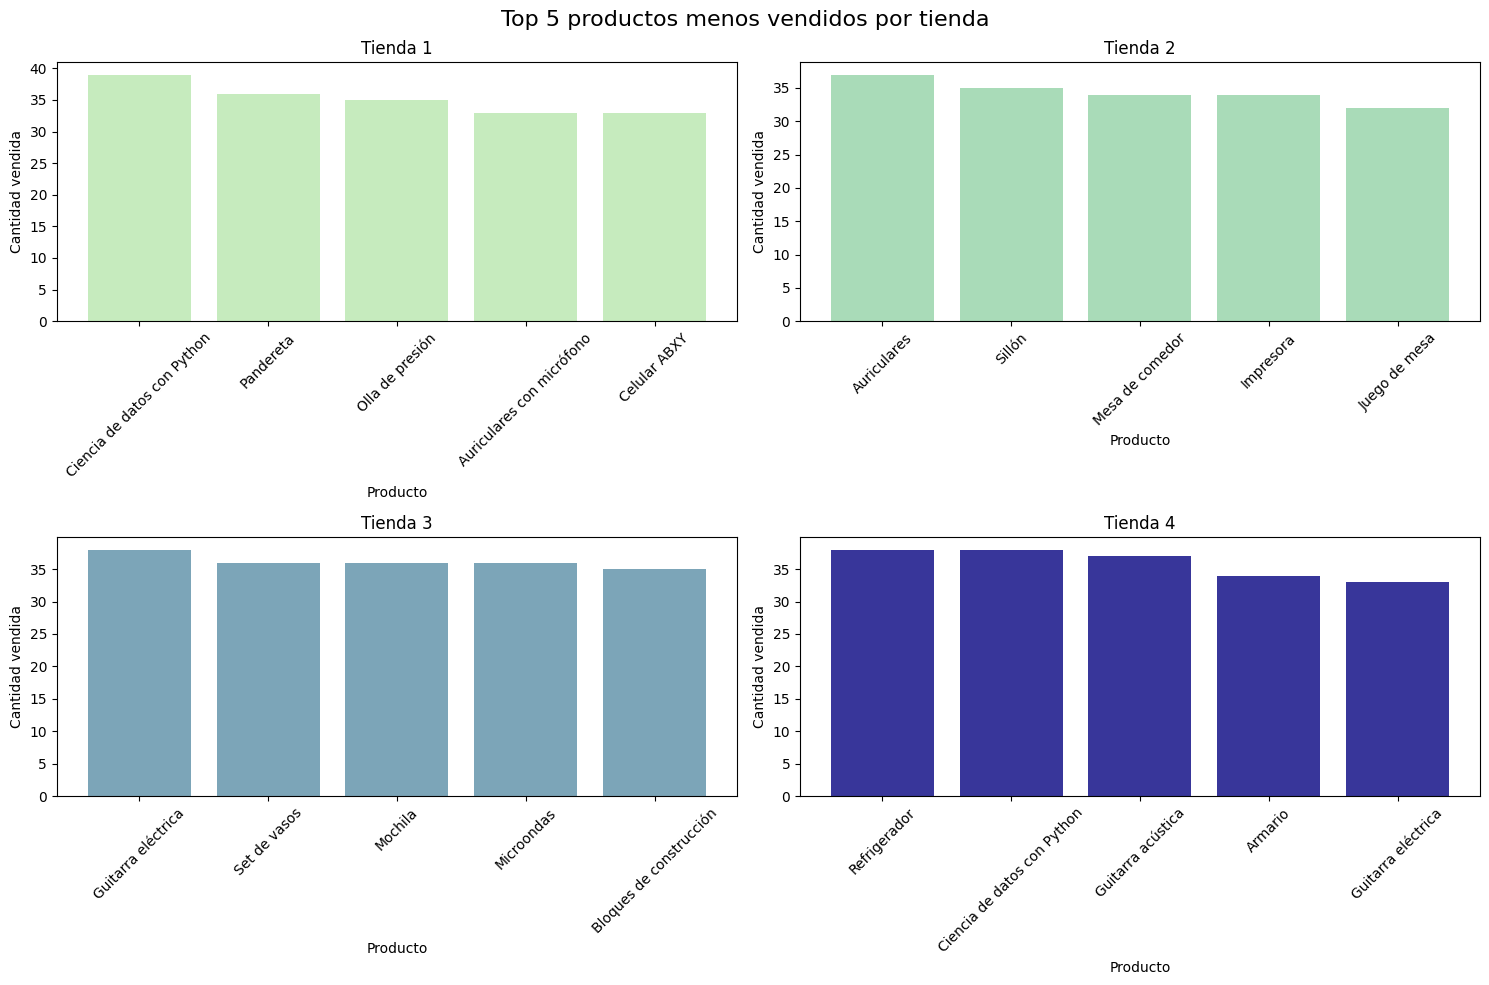

In [ ]:
# Gráfica con 4 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 5 productos menos vendidos por tienda', fontsize=16)

# Tienda 1
axs[0, 0].bar(bottom5_tienda1.index, bottom5_tienda1.values, color='#C6EBBE')
axs[0, 0].set_title('Tienda 1')
axs[0, 0].set_xlabel('Producto')
axs[0, 0].set_ylabel('Cantidad vendida')
axs[0, 0].tick_params(axis='x', rotation=45)

# Tienda 2
axs[0,1].bar(bottom5_tienda2.index, bottom5_tienda2.values, color='#A9DBB8')
axs[0,1].set_title('Tienda 2')
axs[0,1].set_xlabel('Producto')
axs[0,1].set_ylabel('Cantidad vendida')
axs[0, 1].tick_params(axis='x', rotation=45)

# Tienda 3
axs[1,0].bar(bottom5_tienda3.index, bottom5_tienda3.values, color='#7CA5B8')
axs[1,0].set_title('Tienda 3')
axs[1,0].set_xlabel('Producto')
axs[1,0].set_ylabel('Cantidad vendida')
axs[1, 0].tick_params(axis='x', rotation=45)

# Tienda 4
axs[1,1].bar(bottom5_tienda4.index, bottom5_tienda4.values, color='#38369A')
axs[1,1].set_title('Tienda 4')
axs[1,1].set_xlabel('Producto')
axs[1,1].set_ylabel('Cantidad vendida')
axs[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda


In [ ]:
# Calcular el envio promedio por tienda
envio_prom_tienda1 = tienda['Costo de envío'].mean()
envio_prom_tienda2 = tienda2['Costo de envío'].mean()
envio_prom_tienda3 = tienda3['Costo de envío'].mean()
envio_prom_tienda4 = tienda4['Costo de envío'].mean()

#imprimir resultados
print(f"El envio promedio de la tienda 1 es: {envio_prom_tienda1:.2f}")
print(f"El envio promedio de la tienda 2 es: {envio_prom_tienda2:.2f}")
print(f"El envio promedio de la tienda 3 es: {envio_prom_tienda3:.2f}")
print(f"El envio promedio de la tienda 4 es: {envio_prom_tienda4:.2f}")


El envio promedio de la tienda 1 es: 26018.61
El envio promedio de la tienda 2 es: 25216.24
El envio promedio de la tienda 3 es: 24805.68
El envio promedio de la tienda 4 es: 23459.46


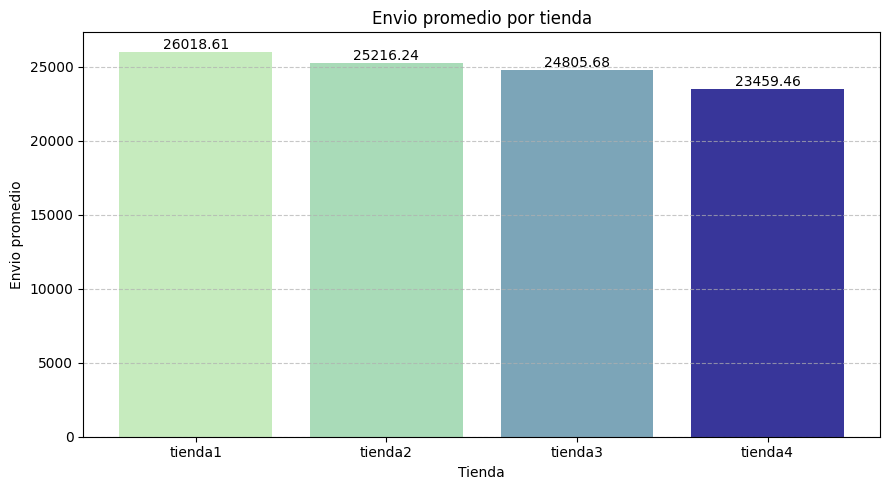

In [ ]:
# Crear una lista con los datos del envío promedio por tienda
tiendas = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
envios_prom = [envio_prom_tienda1, envio_prom_tienda2, envio_prom_tienda3, envio_prom_tienda4]
colores = ['#C6EBBE', '#A9DBB8', '#7CA5B8', '#38369A']

#gráfico de barras
plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, envios_prom, color=colores)
plt.title('Envio promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Envio promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#etiquetas
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"{yval:.2f}",
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


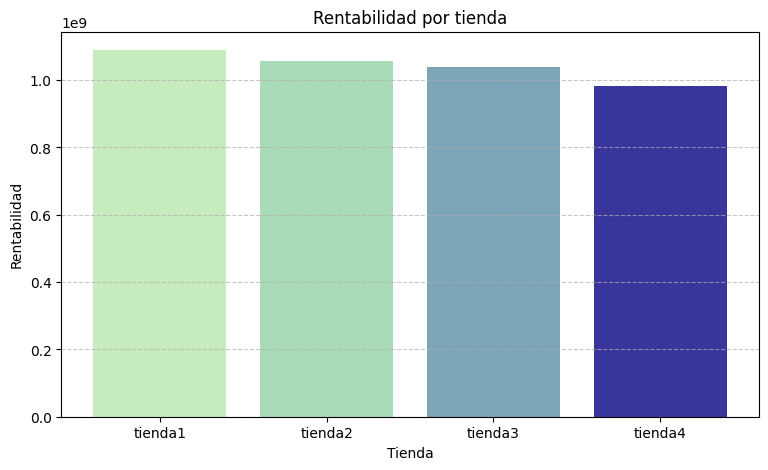

In [ ]:
# Calcular el costo total del envio por tienda
costo_envio_tienda1 = tienda['Costo de envío'].sum()
costo_envio_tienda2 = tienda2['Costo de envío'].sum()
costo_envio_tienda3 = tienda3['Costo de envío'].sum()
costo_envio_tienda4 = tienda4['Costo de envío'].sum()

#Calcular la rentabilidad por tienda
rentabilidad_tienda1 = ingreso_tienda1 - costo_envio_tienda1
rentabilidad_tienda2 = ingreso_tienda2 - costo_envio_tienda2
rentabilidad_tienda3 = ingreso_tienda3 - costo_envio_tienda3
rentabilidad_tienda4 = ingreso_tienda4 - costo_envio_tienda4

#crear una lista con la rentabilidad por tienda
rentabilidades = [rentabilidad_tienda1, rentabilidad_tienda2, rentabilidad_tienda3, rentabilidad_tienda4]
tiendas = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
colores = ['#C6EBBE', '#A9DBB8', '#7CA5B8', '#38369A']

#gráfico
plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, rentabilidades, color=colores)
plt.title('Rentabilidad por tienda')
plt.xlabel('Tienda')
plt.ylabel('Rentabilidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
# Tienda con menor rentabilidad
tienda_menos_rentable = tiendas[rentabilidades.index(min(rentabilidades))]
menos_rentable = min(rentabilidades)
print(f"La tienda con menor rentabilidad es: {tienda_menos_rentable} con una rentabilidad de {menos_rentable:.2f}")


La tienda con menor rentabilidad es: tienda4 con una rentabilidad de 983058300.00


#Conclusion

*Optimización y consolidación estratégica.*

El analisis de datos realizado nos permitió identificar patrones de desempeño en diferentes aspectos, ingresos, volúmenes de venta, ticket promedi y evolución por tienda. Estos indicadores no solo reflejan la situación actual, sino también las oportunidades para mejorar la eficiencia operativa.

#Hallazgos relevantes


1. Se identificó que la tienda 1,2 y 3 destacan por su solidez, ya que tienen estabilidad en sus ventas, tienen ingresos robustos y el ticket promedio evidencia que son el núcleo fuerte de la operación.

2. La tienda 4, por el otro lado, se encuentra rezagada en los indicadores clave.

#Recomendación estratégica

Se propone una reestructuración enfocada en consolidar esfuerzos donde ya se observa mayor rendimiento. Por esta razón, el cierre de la Tienda 4 se presenta como una acción que pueda:

1. Canalizar inversiones hacia puntos de venta con mejores resultados.

2. Optimizar el uso de recursos humanos y logísticos.


3. Facilitar una toma de decisiones más ágil y con menor dispersión operativa.


Esta acción tiene como objetivo fortalecer el negocio, no reducirlo. Es una propuesta basada en la eficiencia, para cuidar su inversión y maximizar el impacto de cada recurso utilizado. Esto permitirá enfocar sus energías en las tiendas con mayor tracción y proyección, facilitando así un crecimiento más sostenible y rentable.